# Crime Data

In [95]:
# Dependencies and Setup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from config import api_key

# API endpoint and API key
base = 'https://api.usa.gov/crime/fbi/cde/'
query = 'arrest/national/all?from=2000&to=2020&API_KEY=' #National Arrests
key = api_key 


### NATIONAL Crime Data

In [96]:
# Make the API request and load the response as JSON
response = requests.get(base + query + key)
data = json.loads(response.content)

# Convert the response to a DataFrame
national_crime_df = pd.DataFrame(data['data'])

# Display National Crime DataFrame
national_crime_df.head()

,data_year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2000,361682,2930540,12035,209345,110898,504725,983630,1269758,469126,...,72408,21039,92337,969905,92599,3826,28315,206599,124377,70477
1,2001,370666,2954811,12793,216214,103080,512993,970357,1266188,446108,...,69316,21125,94871,999907,95408,2690,26708,206489,131353,71176
2,2002,357657,2798919,12574,218341,105300,515226,1067528,1191990,431940,...,63060,21509,83837,985449,96652,7787,21102,210613,124855,71267
3,2003,339217,2780301,12037,220229,102435,506826,1047953,1243799,411767,...,59806,20147,80973,961335,96704,1878,22148,208058,127013,68157
4,2004,329057,2891575,11586,220897,101103,504066,1049463,1306368,423050,...,65280,19653,82033,979208,97356,4662,27365,206463,131725,67022


In [97]:
# Create a new column for total crimes in the dataframe 
national_crime_df['total_crimes'] = national_crime_df.iloc[:, 1:].sum(axis=1)


In [98]:
# Create a pivot table that aggregates the sum of all crimes for each year
national_crime_pivot = national_crime_df.pivot_table(index='data_year', 
values=national_crime_df.columns[1:], aggfunc='sum')

# Reset the index to make the data year a column
national_crime_pivot = national_crime_pivot.reset_index()

# Rename the columns as needed
national_crime_pivot = national_crime_pivot.rename(columns={'data_year': 'Year'})
national_crime_pivot.head()

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.",total_crimes
0,2000,361682,2930540,12035,209345,110898,504725,983630,1269758,469126,...,21039,92337,70477,969905,92599,3826,28315,206599,124377,10605580
1,2001,370666,2954811,12793,216214,103080,512993,970357,1266188,446108,...,21125,94871,71176,999907,95408,2690,26708,206489,131353,10667056
2,2002,357657,2798919,12574,218341,105300,515226,1067528,1191990,431940,...,21509,83837,71267,985449,96652,7787,21102,210613,124855,10364293
3,2003,339217,2780301,12037,220229,102435,506826,1047953,1243799,411767,...,20147,80973,68157,961335,96704,1878,22148,208058,127013,10234445
4,2004,329057,2891575,11586,220897,101103,504066,1049463,1306368,423050,...,19653,82033,67022,979208,97356,4662,27365,206463,131725,10453593


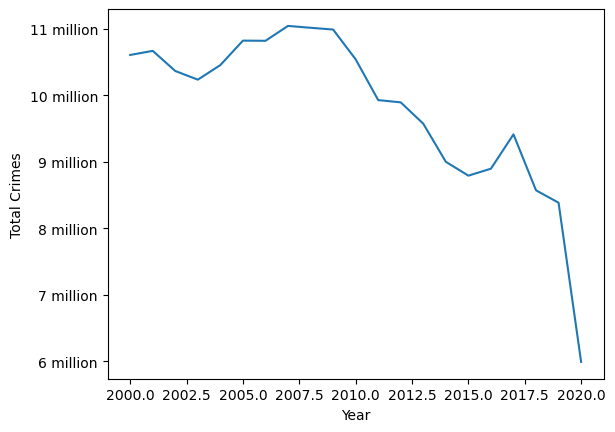

In [99]:
# Plot the total crimes using a line graph
plt.plot(national_crime_pivot['Year'], national_crime_pivot['total_crimes'])

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Total Crimes')

# Define a custom FuncFormatter to display the y-axis labels in a custom format
def y_fmt(y, pos):
    return '{:,.0f}'.format(y/1e6) + ' million'

# Use the custom formatter function for the y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# Show the plot
plt.show()

### TEXAS Crime Data

In [100]:
# API endpoint and API key for Texas crime data
base_tx = 'https://api.usa.gov/crime/fbi/cde/'
query_tx = 'arrest/state/TX/all?from=2000&to=2020&API_KEY='
key_tx = api_key

# Make the API request for Texas crime data and load the response as JSON
response_tx = requests.get(base_tx + query_tx + key_tx)

# Check if the API request was successful
if response_tx.status_code == 200:
    data_tx = json.loads(response_tx.content)
else:
    print("Error: API request failed with status code {}".format(response_tx.status_code))
    


In [101]:
# Convert the response to a DataFrame for Texas crime data
tx_crime_df = pd.DataFrame(data_tx['data'])
tx_crime_df.head()

,data_year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2000,21707,289329,780,17045,14327,36289,96074,104964,151006,...,6313,2225,6104,97112,636,52,1615,12535,10510,4900
1,2001,21550,278360,812,18021,11799,34866,91256,102652,140824,...,6641,2193,6735,99779,726,23,1544,11547,10073,4500
2,2002,21943,290273,858,18605,11674,37397,90283,101842,132520,...,6879,2330,6877,104229,838,41,1995,12175,10956,4515
3,2003,21146,283959,799,18000,10724,36403,87683,106847,120778,...,4794,2210,6397,93737,827,0,508,11904,11411,4449
4,2004,22989,313823,866,19270,15241,41863,97479,125075,129836,...,6574,2166,7281,107039,835,15,4612,13018,12967,4983


In [102]:
# Create a new column for total crimes in the dataframe 
tx_crime_df['total_crimes'] = tx_crime_df.iloc[:, 1:].sum(axis=1)
tx_crime_df.head()

,data_year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",total_crimes
0,2000,21707,289329,780,17045,14327,36289,96074,104964,151006,...,2225,6104,97112,636,52,1615,12535,10510,4900,1027986
1,2001,21550,278360,812,18021,11799,34866,91256,102652,140824,...,2193,6735,99779,726,23,1544,11547,10073,4500,1000758
2,2002,21943,290273,858,18605,11674,37397,90283,101842,132520,...,2330,6877,104229,838,41,1995,12175,10956,4515,1024855
3,2003,21146,283959,799,18000,10724,36403,87683,106847,120778,...,2210,6397,93737,827,0,508,11904,11411,4449,977917
4,2004,22989,313823,866,19270,15241,41863,97479,125075,129836,...,2166,7281,107039,835,15,4612,13018,12967,4983,1101046


In [103]:
# Create a pivot table that aggregates the sum of all crimes for each year
tx_crime_pivot = tx_crime_df.pivot_table(index='data_year', 
values=tx_crime_df.columns[1:], aggfunc='sum')

# Reset the index to make the data year a column
tx_crime_pivot = tx_crime_pivot.reset_index()

# Rename the columns as needed
tx_crime_pivot = tx_crime_pivot.rename(columns={'data_year': 'Year'})
tx_crime_pivot.head()

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.",total_crimes
0,2000,21707,289329,780,17045,14327,36289,96074,104964,151006,...,2225,6104,4900,97112,636,52,1615,12535,10510,1027986
1,2001,21550,278360,812,18021,11799,34866,91256,102652,140824,...,2193,6735,4500,99779,726,23,1544,11547,10073,1000758
2,2002,21943,290273,858,18605,11674,37397,90283,101842,132520,...,2330,6877,4515,104229,838,41,1995,12175,10956,1024855
3,2003,21146,283959,799,18000,10724,36403,87683,106847,120778,...,2210,6397,4449,93737,827,0,508,11904,11411,977917
4,2004,22989,313823,866,19270,15241,41863,97479,125075,129836,...,2166,7281,4983,107039,835,15,4612,13018,12967,1101046


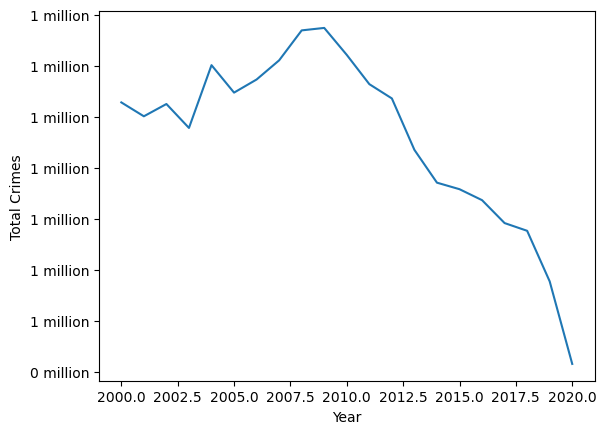

In [104]:
# Plot the total crimes using a line graph
plt.plot(tx_crime_pivot['Year'], tx_crime_pivot['total_crimes'])

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Total Crimes')

# Define a custom FuncFormatter to display the y-axis labels in a custom format
def y_fmt(y, pos):
    return '{:,.0f}'.format(y/1e6) + ' million'

# Use the custom formatter function for the y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# Show the plot
plt.show()

### Comparing Texas vs. National Crime Rates

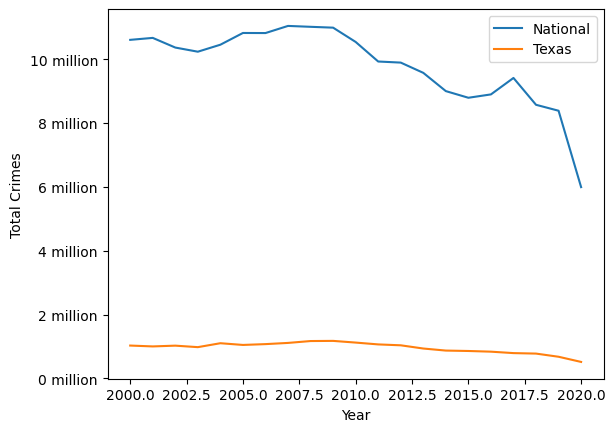

In [108]:
# Plot the total crimes for both national and Texas data using a line graph
plt.plot(national_crime_pivot['Year'], national_crime_pivot['total_crimes'], label='National')
plt.plot(tx_crime_pivot['Year'], tx_crime_pivot['total_crimes'], label='Texas')

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Total Crimes')

# Add a legend to the plot
plt.legend()

# Define a custom FuncFormatter to display the y-axis labels in a custom format
def y_fmt(y, pos):
    return '{:,.0f}'.format(y/1e6) + ' million'

# Use the custom formatter function for the y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# Show the plot
plt.show()